In [1]:
from qiskit import QuantumRegister,ClassicalRegister,QuantumCircuit,Aer,execute
from qiskit.visualization import plot_state_qsphere,plot_histogram
from qalu import half_adder,full_adder
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
ba=Aer.get_backend("qasm_simulator")
bv=Aer.get_backend("statevector_simulator")

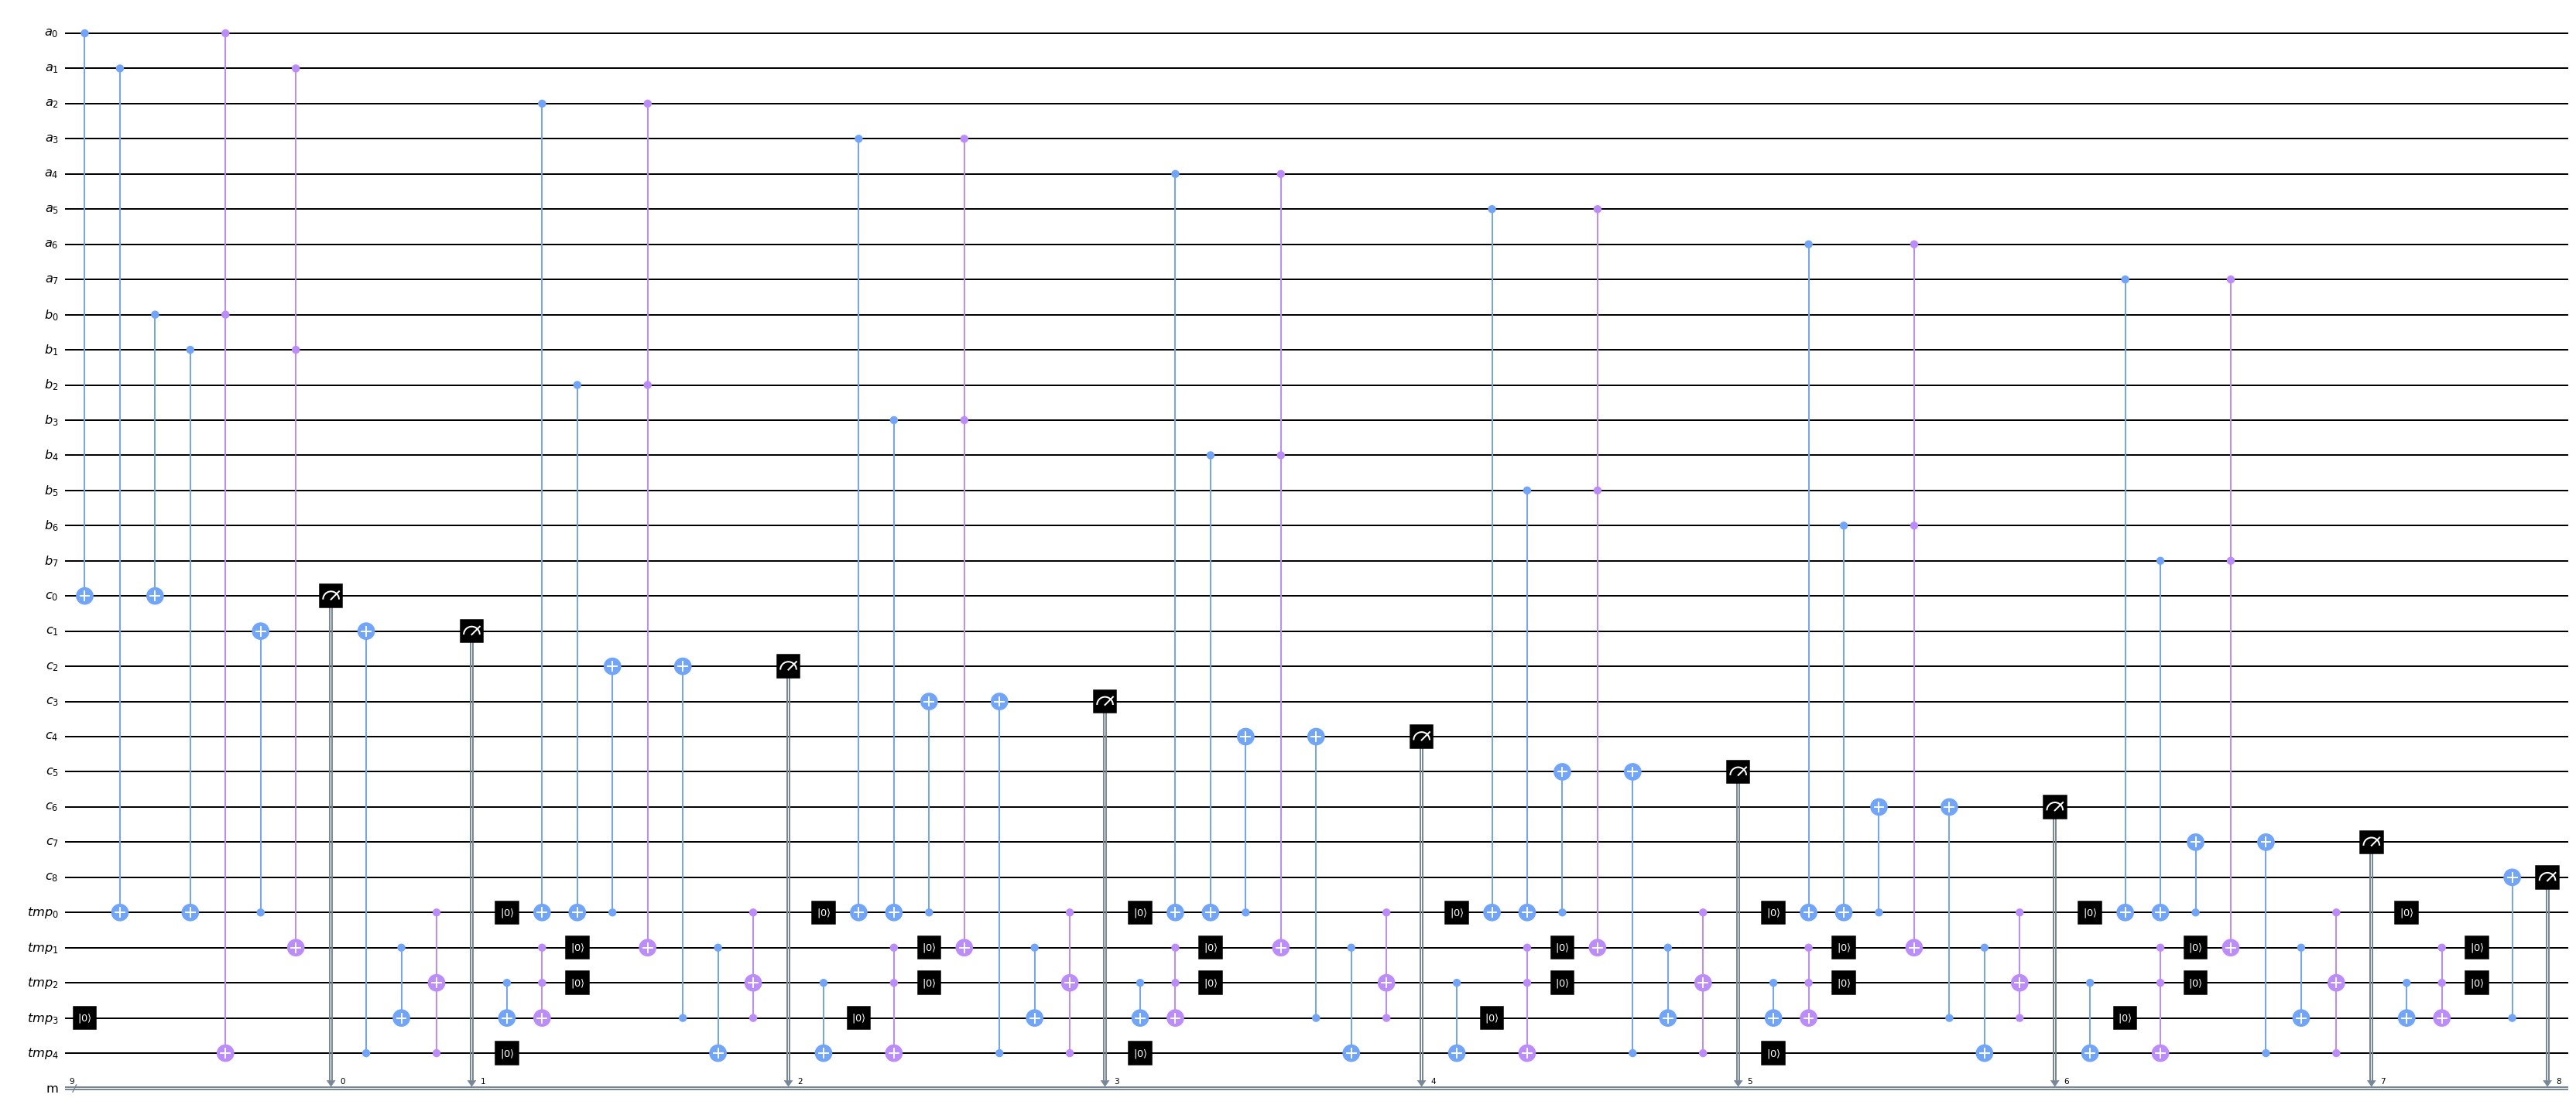

In [3]:
a=QuantumRegister(8,"a")
b=QuantumRegister(8,"b")
c=QuantumRegister(9,"c")
tmp=QuantumRegister(5,"tmp")
m=ClassicalRegister(9,"m")

qc=QuantumCircuit(a,b,c,tmp,m)
half_adder(qc,0,8,29,16)

for i in range(7):
    if i%2==0:
        qc.reset(28)
        full_adder(qc,i+1,i+9,29,25,26,27,28,i+17)
    else:
        qc.reset(29)
        full_adder(qc,i+1,i+9,28,25,26,27,29,i+17)
    for j in range(25,28):
        qc.reset(j)
qc.cx(28,24)
for i in range(16,25):
    qc.measure(i,i-16)
display(qc.draw("mpl",fold=-1))